In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [2]:
import seaborn as sns
import numpy as np

## Content:
> ### <a href='#1'>1. Load Data, Check Data, Null Values</a>

 
> ### <a href='#2'>2. Filter Null Values</a> 
 
> ### <a href='#3'>3. Check Null Values</a> 
 
> ### <a href='#4'>4. Droping/ Filling/ Replacing Null Values</a> 

## <a id='1'>1.  Load Data, Check Data, Null Values, etc

In [3]:
data = pd.read_csv("../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

First, we need to check how many null values do we have in each data set:

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can divide each raw with the sum of the raws to have a percentage of null values in each raw:

In [7]:
Missing_percentage = (data.isnull().sum()/data.shape[0])*100
print(np.round(Missing_percentage, decimals=2))

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


We can also visualize the null values. Black lines are showning the null values in each column

<AxesSubplot:>

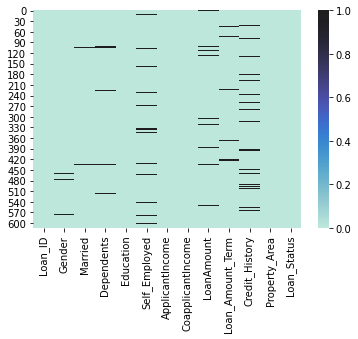

In [8]:
import seaborn as sns
sns.heatmap(data.isnull(), center=True)

# <a id='2'> 2. Filter Null Values

We want to filter the raws and columns with more than 10 null values:

In [9]:
# columns with more than 10 null values
more_10nulls_columns = data.columns[(data.isna().sum()>10)]
#filter data
data[more_10nulls_columns]

,Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,0,No,NaN,360.0,1.0
1,Male,1,No,128.0,360.0,1.0
2,Male,0,Yes,66.0,360.0,1.0
3,Male,0,No,120.0,360.0,1.0
4,Male,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...
609,Female,0,No,71.0,360.0,1.0
610,Male,3+,No,40.0,180.0,1.0
611,Male,1,No,253.0,360.0,1.0
612,Male,2,No,187.0,360.0,1.0


In [10]:
# raws with more than 2 null values - method 1
indexx = []
for i in range(0, data.shape[0]):
    if (data.iloc[i].isna().sum()>2):
        indexx.append(i)
data.iloc[indexx]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [11]:
# raws with more than 2 null values - method 2
data[data.isnull().sum(axis=1)>2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


#### Columns with largest null values

In [12]:
# 3 most largest
data.isnull().sum().nlargest(3)

Credit_History    50
Self_Employed     32
LoanAmount        22
dtype: int64

# <a id='3'> 3. Check Null Values:

Purpose: We want to make sure that the values are missed. Sometimes, null values are not really "missed" data. For example, imagine you have "balcony" column in a house dataset. If you have no balcony in a house, maybe the corresponding value is left as a blank or "NAN". In this case, we know the missing value is "zero" not a real null value.
Maybe the data does not exist at all. For example, size of the balcony in a house dataset where house does not have any balcony!

What we need to do? CHECK THE NULL VALUES :)

In [13]:
data[data.isnull().sum(axis=1)>0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


For example if someone does not married, he/she may not have dependent. So, 'nan' in dependent means no dependent

In [14]:
data[(data.Dependents.isna()) & (data.Married=='No')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


Lets replace NaN with 'NA' or not applicable

In [15]:
data.Dependents[(data.Dependents.isna()) & (data.Married=='No')] = "NA"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan, 'NA'], dtype=object)

# <a id='4'> 4. Droping/ Filling/ Replacing Null Values

#### Drop Null Values

In [17]:
# drop null values:
data.dropna()
#pros: easy, fast
#cons: loosing some data
#if you want to change the dataset permanently:
#data.dropna(inplace=True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Fill based on previous or next values

In [18]:
#based on previous value in the column
data.fillna(method='backfill')
# We do not changed the dataset permanently, in case if you want to change the dataset use inplace=True method
#pros: fast, easy, no previous knowledge about data
#cons: altering data 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
#based on next value in the column
data.fillna(method='ffill')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Replace with specific value

In [20]:
index_Loan_Null = data.Loan_Amount_Term[data.Loan_Amount_Term.isna()].index
data.Loan_Amount_Term[data.Loan_Amount_Term.isna()]

19    NaN
36    NaN
44    NaN
45    NaN
73    NaN
112   NaN
165   NaN
197   NaN
223   NaN
232   NaN
335   NaN
367   NaN
421   NaN
423   NaN
Name: Loan_Amount_Term, dtype: float64

In [21]:
# replace the loan amount with 360
newdata = data.Loan_Amount_Term.fillna(value=360) 
newdata.iloc[index_Loan_Null]

19     360.0
36     360.0
44     360.0
45     360.0
73     360.0
112    360.0
165    360.0
197    360.0
223    360.0
232    360.0
335    360.0
367    360.0
421    360.0
423    360.0
Name: Loan_Amount_Term, dtype: float64

In [22]:
# replace with avarage value
newdata = data.Loan_Amount_Term.fillna(value=data.Loan_Amount_Term.mean()) 
newdata.iloc[index_Loan_Null]

19     342.0
36     342.0
44     342.0
45     342.0
73     342.0
112    342.0
165    342.0
197    342.0
223    342.0
232    342.0
335    342.0
367    342.0
421    342.0
423    342.0
Name: Loan_Amount_Term, dtype: float64

In [23]:
# replace with mode value
newdata = data.Loan_Amount_Term.fillna(value=data.Loan_Amount_Term.mode().max())
newdata.iloc[index_Loan_Null]

19     360.0
36     360.0
44     360.0
45     360.0
73     360.0
112    360.0
165    360.0
197    360.0
223    360.0
232    360.0
335    360.0
367    360.0
421    360.0
423    360.0
Name: Loan_Amount_Term, dtype: float64

In [24]:
# replace with min or max value
newdata = data.Loan_Amount_Term.fillna(value=data.Loan_Amount_Term.min())  #min,   replace min with max for maximum value
newdata.iloc[index_Loan_Null]

19     12.0
36     12.0
44     12.0
45     12.0
73     12.0
112    12.0
165    12.0
197    12.0
223    12.0
232    12.0
335    12.0
367    12.0
421    12.0
423    12.0
Name: Loan_Amount_Term, dtype: float64

#### Replace Using Other Column's Information

Lets play with "Married" column and try to replace the null values

In [25]:
data.Married.unique()

array(['No', 'Yes', nan], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Married', ylabel='count'>

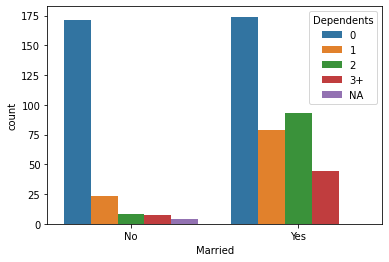

In [26]:
import seaborn as sns
sns.countplot(data.Married, hue=data.Dependents)

As can be seen from the above graph, if someone does not married, it is less likely to have dependents. Hence, we can say: if married section is null value, and dependent value is zero, most probabley married column is 'No'

In [27]:
data.Married[(data.Married.isna()) & (data.Dependents !=0)]

104    NaN
228    NaN
435    NaN
Name: Married, dtype: object

In [28]:
data.Married[(data.Married.isna()) & (data.Dependents !=0)] = 'No'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### I am working on this notebook ....